In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [3]:
# Load dataset
df = pd.read_csv('best_buy_laptops_2024.csv')


In [4]:
# Check for missing values
missing_values = df.isnull().sum()


In [5]:
# Calculate total number of missing cells
total_missing_cells = missing_values.sum()

# Create a DataFrame to store the results
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Display the DataFrame
print("Number of Missing Values in Each Column:")
print(missing_values_df)

# Display total number of missing cells
print("\nTotal Number of Missing Cells:", total_missing_cells)


Number of Missing Values in Each Column:
                             Missing Values
brand                                     0
model                                     1
aggregateRating/ratingValue             132
aggregateRating/reviewCount             132
offers/price                            227
offers/priceCurrency                      0
depth                                    58
width                                    58
features/0/description                    3
features/1/description                    6

Total Number of Missing Cells: 617


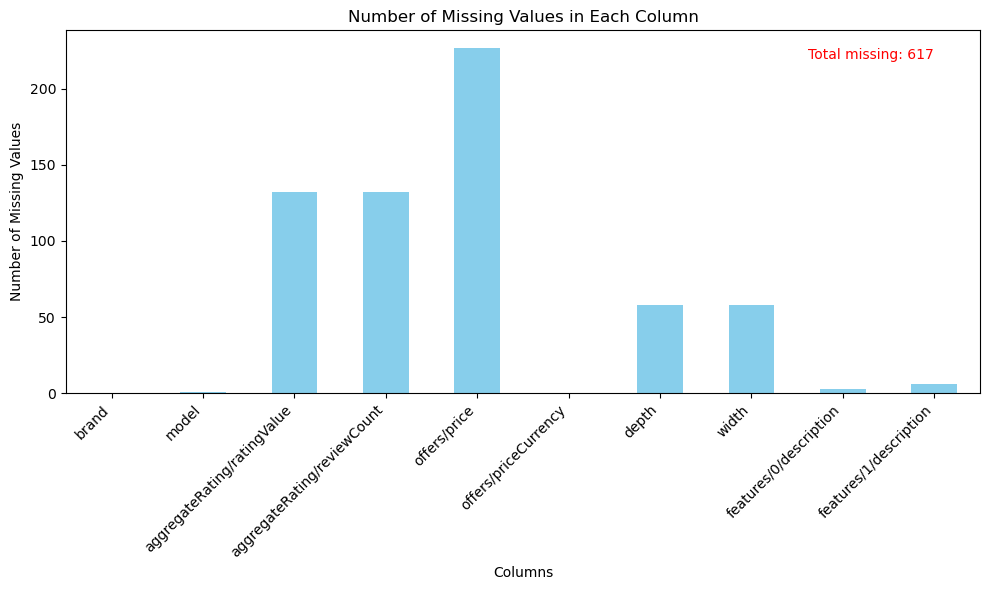

In [6]:
# Create a bar graph for missing value
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.text(len(missing_values)-1, max(missing_values), f'Total missing: {total_missing_cells}', ha='right', va='top', fontsize=10, color='red')
plt.tight_layout()
plt.show()

In [7]:
# Fill missing values with the mean of numerical columns rounded to two decimal places
numeric_columns = df.select_dtypes(include=['number']).columns
mean_rounded = df[numeric_columns].mean().round(2)
df[numeric_columns] = df[numeric_columns].fillna(mean_rounded)


In [8]:
# Fill missing categorical values with a specific value
categorical_columns = df.select_dtypes(exclude=['number']).columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [10]:
# Convert price column to numeric format
df['offers/price'] = pd.to_numeric(df['offers/price'], errors='coerce')


In [11]:
# Standardize or normalize numerical features (e.g., depth and width)
scaler = StandardScaler()
df[['depth', 'width']] = scaler.fit_transform(df[['depth', 'width']])

In [12]:
# Data validation and sanity checks
df = df[df['offers/price'] > 0]
# Display the DataFrame
display(df)

,brand,model,aggregateRating/ratingValue,aggregateRating/reviewCount,offers/price,offers/priceCurrency,depth,width,features/0/description,features/1/description
0,Dell,i7430-7374SLV-PUS,4.70,1088.00,1159.04,USD,-0.277923,0.138409,Windows 11 brings back the Start Menu from Win...,"Equipped with a FHD+ IPS touch screen, the bor..."
1,Dell,i3520-5810BLK-PUS,4.60,839.00,1159.04,USD,-0.149749,0.698291,Experience the most secure Windows ever built ...,Natural finger-touch navigation makes the most...
2,Lenovo,82YL0002US,4.70,127.00,1159.04,USD,-0.336517,0.186399,Windows 11 brings back the Start Menu from Win...,Find the relevant information and ideas you ne...
3,Microsoft,DTI-00001,4.70,926.00,1159.04,USD,-0.651458,-0.136734,Find the relevant information and ideas you ne...,Iconic 2-in-1 design transforms into what you ...
4,Microsoft,R1S-00062,4.70,422.00,1159.04,USD,-0.321868,0.055226,Find the relevant information and ideas you ne...,"Family, friends, passions, music, creations – ..."
...,...,...,...,...,...,...,...,...,...,...
484,Dell,5490,5.00,3.00,365.99,USD,-0.248626,0.375159,Built for business. Protect your data with ent...,Its 1920 x 1080 resolution showcases your game...
485,Lenovo,21EX0008US,5.00,1.00,1449.99,USD,-0.446380,-3.614405,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."
486,Lenovo,21HF000CUS,5.00,1.00,1089.99,USD,-0.274261,-3.592009,Experience enhanced productivity and advanced ...,"Indulge in breathtaking visuals on a 14"" WUXGA..."
487,Lenovo,21EX0003US,4.41,254.71,1249.99,USD,-0.446380,-3.614405,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."


In [13]:
# Summary statistics
summary_stats = df.describe()
display(summary_stats)


,aggregateRating/ratingValue,aggregateRating/reviewCount,offers/price,depth,width
count,489.000000,489.000000,489.000000,4.890000e+02,4.890000e+02
mean,4.412515,254.709039,1159.040368,-1.888968e-16,3.923242e-16
std,0.548240,518.669202,572.338558,1.001024e+00,1.001024e+00
min,1.000000,1.000000,143.990000,-3.365078e+00,-3.630401e+00
25%,4.410000,5.000000,929.990000,-3.255305e-01,-6.314914e-02
50%,4.410000,143.000000,1159.040000,-2.523782e-02,9.681734e-02
75%,4.700000,254.710000,1159.040000,1.395569e-01,6.662980e-01
max,5.000000,4231.000000,4489.990000,3.871242e+00,1.974824e+00


In [14]:
# Create a new DataFrame with selected columns
specs_df = df[['brand', 'model', 'features/0/description', 'features/1/description']].copy()
# Rename column features/0/description to featuresMain
specs_df.rename(columns={'features/0/description': 'featuresMain'}, inplace=True)
# Rename column features/1/description to featSecondary
specs_df.rename(columns={'features/1/description': 'featSecondary'}, inplace=True)

# Display the new DataFrame
display( specs_df )


,brand,model,featuresMain,featSecondary
0,Dell,i7430-7374SLV-PUS,Windows 11 brings back the Start Menu from Win...,"Equipped with a FHD+ IPS touch screen, the bor..."
1,Dell,i3520-5810BLK-PUS,Experience the most secure Windows ever built ...,Natural finger-touch navigation makes the most...
2,Lenovo,82YL0002US,Windows 11 brings back the Start Menu from Win...,Find the relevant information and ideas you ne...
3,Microsoft,DTI-00001,Find the relevant information and ideas you ne...,Iconic 2-in-1 design transforms into what you ...
4,Microsoft,R1S-00062,Find the relevant information and ideas you ne...,"Family, friends, passions, music, creations – ..."
...,...,...,...,...
484,Dell,5490,Built for business. Protect your data with ent...,Its 1920 x 1080 resolution showcases your game...
485,Lenovo,21EX0008US,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."
486,Lenovo,21HF000CUS,Experience enhanced productivity and advanced ...,"Indulge in breathtaking visuals on a 14"" WUXGA..."
487,Lenovo,21EX0003US,Experience enhanced productivity and advanced ...,"Experience stunning visuals on a compact 13.3""..."


In [15]:
# Get the data types of columns in the DataFrame
column_types = specs_df.dtypes
# Print data types of each column
for column in specs_df.columns:
    print( f"{column}: {specs_df[column].dtype}" )
# Display information about the DataFrame
print( specs_df.info() )


brand: object
model: object
featuresMain: object
featSecondary: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          489 non-null    object
 1   model          489 non-null    object
 2   featuresMain   489 non-null    object
 3   featSecondary  489 non-null    object
dtypes: object(4)
memory usage: 15.4+ KB
None


In [16]:
# Convert column featuresMain and featSecondary to strings
specs_df['featuresMain'] = specs_df['featuresMain'].astype("string")
specs_df['featSecondary'] = specs_df['featSecondary'].astype("string")
# Print data types of each column
for column in specs_df.columns:
    print( f"{column}: {specs_df[column].dtype}" )
# Inspect unique values in featuresMain column
#unique_values = specs_df['featuresMain'].unique()
#print(unique_values)

brand: object
model: object
featuresMain: string
featSecondary: string


In [17]:
# Display the new DataFrame
display( specs_df['featuresMain'] )

0      Windows 11 brings back the Start Menu from Win...
1      Experience the most secure Windows ever built ...
2      Windows 11 brings back the Start Menu from Win...
3      Find the relevant information and ideas you ne...
4      Find the relevant information and ideas you ne...
                             ...                        
484    Built for business. Protect your data with ent...
485    Experience enhanced productivity and advanced ...
486    Experience enhanced productivity and advanced ...
487    Experience enhanced productivity and advanced ...
488    Microsoft Windows 11 Pro gives you a user-frie...
Name: featuresMain, Length: 489, dtype: string

In [18]:
import re

# Define a function to extract processor-related information from a text
def extract_processors(text):
    # Define keywords related to processors
    processor_keywords = ['processor', 'CPU', 'core']
    
    # Compile regex pattern to match processor-related keywords
    pattern = re.compile(r'\b(?:' + '|'.join(processor_keywords) + r')\b', flags=re.IGNORECASE)
    
    # Find all matches in the text
    matches = re.findall(pattern, text)
    
    # Return unique matches
    return list(set(matches))

# Apply the function to each description in the 'featuresMain' column
processor_mentions = specs_df['featuresMain'].apply(extract_processors)

# Display the processor mentions for each description
for i, processors in enumerate(processor_mentions):
    print(f"Description {i+1}: {processors}")


Description 1: []
Description 2: []
Description 3: []
Description 4: []
Description 5: []
Description 6: []
Description 7: []
Description 8: []
Description 9: ['processor']
Description 10: []
Description 11: ['processor']
Description 12: []
Description 13: []
Description 14: []
Description 15: []
Description 16: []
Description 17: []
Description 18: []
Description 19: []
Description 20: []
Description 21: []
Description 22: []
Description 23: []
Description 24: []
Description 25: []
Description 26: []
Description 27: []
Description 28: []
Description 29: []
Description 30: []
Description 31: []
Description 32: []
Description 33: []
Description 34: []
Description 35: []
Description 36: []
Description 37: []
Description 38: []
Description 39: []
Description 40: []
Description 41: []
Description 42: []
Description 43: []
Description 44: []
Description 45: []
Description 46: []
Description 47: []
Description 48: []
Description 49: []
Description 50: []
Description 51: []
Description 52: []

In [19]:


# Define a function to check if a text contains mentions of processors
def contains_processors(text):
    # Define keywords related to processors
    processor_keywords = ['processor', 'CPU', 'core']
    
    # Compile regex pattern to match processor-related keywords
    pattern = re.compile(r'\b(?:' + '|'.join(processor_keywords) + r')\b', flags=re.IGNORECASE)
    
    # Check if the text contains any matches
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to each description in the 'featuresMain' column
rows_with_processors = specs_df['featuresMain'].apply(contains_processors)

# Count the number of rows containing mentions of processors
total_rows_with_processors = rows_with_processors.sum()

# Print the total number of rows containing mentions of processors
print(f"Total number of rows containing mentions of processors: {total_rows_with_processors}")



Total number of rows containing mentions of processors: 26


In [20]:


# Define a function to check if a text contains mentions of processors
def contains_processors(text):
    # Define keywords related to processors
    processor_keywords = ['processor', 'CPU', 'core']
    
    # Compile regex pattern to match processor-related keywords
    pattern = re.compile(r'\b(?:' + '|'.join(processor_keywords) + r')\b', flags=re.IGNORECASE)
    
    # Check if the text contains any matches
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to each description in the 'featuresMain' column
rows_with_processors = specs_df['featSecondary'].apply(contains_processors)

# Count the number of rows containing mentions of processors
total_rows_with_processors = rows_with_processors.sum()

# Print the total number of rows containing mentions of processors
print(f"Total number of rows containing mentions of processors: {total_rows_with_processors}")



Total number of rows containing mentions of processors: 23


In [21]:
# Define a function to extract RAM-related information from a text
def extract_ram(text):
    # Define keywords related to RAM
    ram_keywords = ['RAM', 'memory', 'DDR'] 
    # Compile regex pattern to match RAM-related keywords
    pattern = re.compile(r'\b(?:' + '|'.join(ram_keywords) + r')\b', flags=re.IGNORECASE)   
    # Check if the text contains any matches
    if re.search(pattern, text):
        return True
    else:
        return False

# Apply the function to each description in the 'featuresMain' column
rows_with_RAM = specs_df['featuresMain'].apply(extract_ram)
total_rows_with_RAM = rows_with_RAM.sum()
print(f"Total number of rows containing mentions of RAM: {total_rows_with_RAM}")


Total number of rows containing mentions of RAM: 6


In [22]:


from collections import Counter
from nltk.corpus import stopwords

# Download the NLTK stopwords dataset
import nltk
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))
# Combine all descriptions from both columns into a single string
all_descriptions = ' '.join( specs_df['featuresMain'] + ' ' + specs_df['featSecondary'] )

# Define a function to tokenize the combined string into words, considering specific phrases, numbers, and patterns
def tokenize_text(text):
    # Define regular expressions to match specific Windows versions and patterns
    windows_versions = ['Windows 11', 'Windows 10', 'Windows 8', 'Windows 7', 'Windows Vista', 'Windows XP']
    resolution_pattern = re.compile(r'\b\d+\s*x\s*\d+\b')
    side_by_side_pattern = re.compile(r'\b(side\s*by\s*side)\b', flags=re.IGNORECASE)

    # Compile regular expressions to match Windows versions
    version_patterns = [re.compile(re.escape(version), flags=re.IGNORECASE) for version in windows_versions]

    # Replace specific Windows versions with a placeholder token
    for pattern, version in zip(version_patterns, windows_versions):
        text = re.sub(pattern, f'WINDOWS_VERSION_{version.split()[-1]}', text)
    # Replace specific resolution patterns with a placeholder token
    text = re.sub(resolution_pattern, 'RESOLUTION_PATTERN', text)
    # Replace occurrences of 'side by side' with a single token
    text = re.sub(side_by_side_pattern, 'SIDE_BY_SIDE_PATTERN', text)

    # Tokenize the modified text into words
    words = re.findall(r'\b\w+\b', text.lower())
    # Exclude specific words 'like' and 'need'
    words = [word for word in words if word not in stop_words and word not in ['like', 'need', 'comes', '16']]
    # Replace occurrences of 'resolution' and 'resolution_pattern' with a single token
    words = ['RESOLUTION' if word in ['resolution', 'resolution_pattern'] else word for word in words]

    return words

# Tokenize the combined string into words, considering specific phrases and numbers
words = tokenize_text(all_descriptions)
# Filter out stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)
# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Print the top 20 most common words
print("Top 20 most used words in featuresMain and featSecondary (excluding stopwords):")
for word, count in top_20_words:
    print(f"{word}: {count}")



Top 20 most used words in featuresMain and featSecondary (excluding stopwords):
RESOLUTION: 520
windows_version_11: 411
experience: 223
new: 210
clarity: 191
color: 189
features: 188
tools: 155
power: 150
security: 135
screen: 129
pro: 127
display: 126
relevant: 120
impressive: 116
ips: 111
games: 106
viewing: 99
productivity: 98
efficient: 93


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


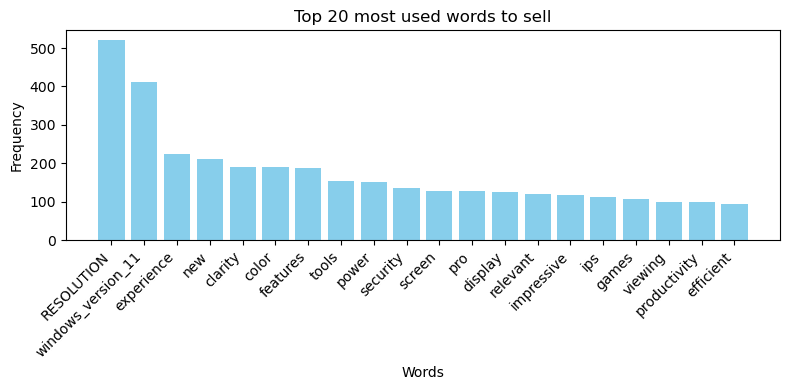

In [23]:
# Extract words and counts for plotting
words = [word[0] for word in top_20_words]
counts = [word[1] for word in top_20_words]

# Plot the bar plot
plt.figure(figsize=(8, 4))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 most used words to sell')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Data visualization


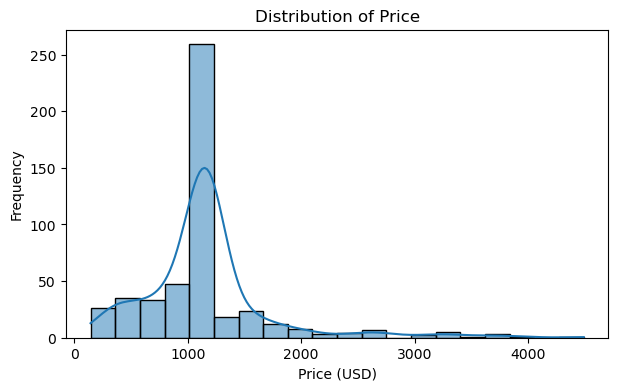

In [24]:
# Histogram of price
plt.figure(figsize=(7, 4))
sns.histplot(df['offers/price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()  # Display histogram

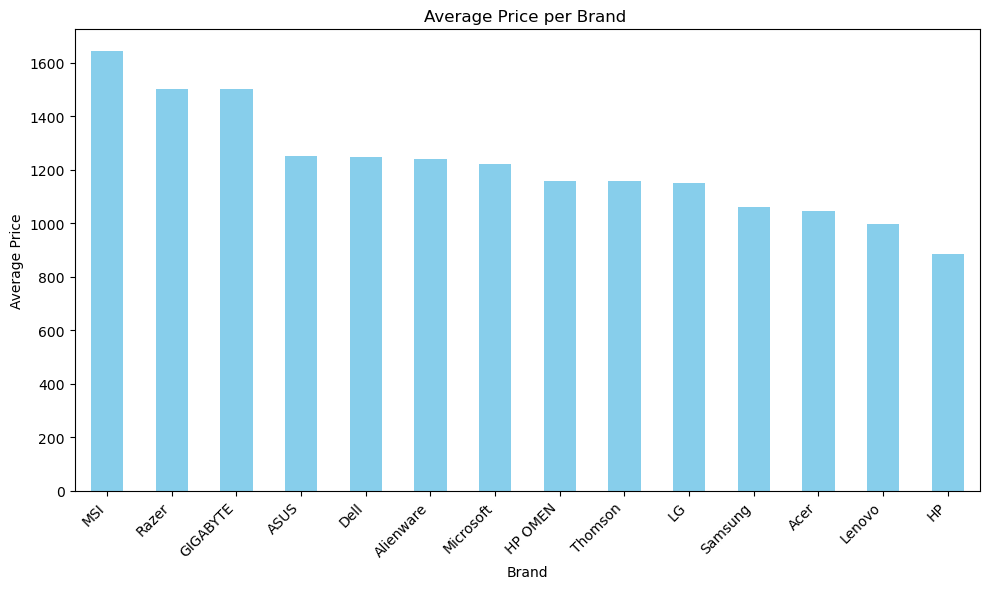

In [25]:
# Calculate average price per brand
average_price_per_brand = df.groupby('brand')['offers/price'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
average_price_per_brand.plot(kind='bar', color='skyblue')
plt.title('Average Price per Brand ')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

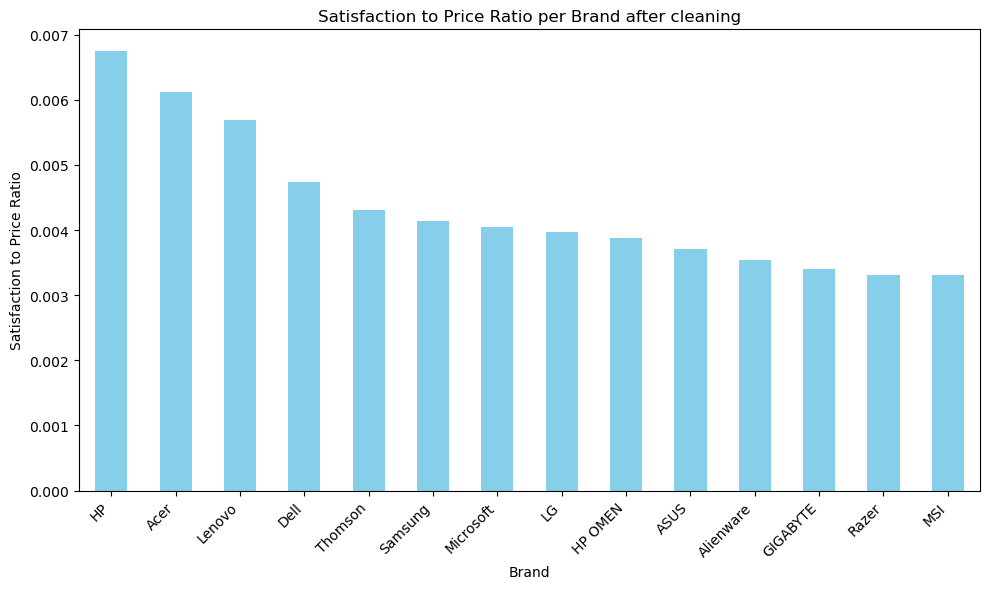

In [26]:
# Calculate satisfaction to price ratio
df['satisfaction_to_price_ratio'] = df['aggregateRating/ratingValue'] / df['offers/price']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
df.groupby('brand')['satisfaction_to_price_ratio'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Satisfaction to Price Ratio per Brand after cleaning')
plt.xlabel('Brand')
plt.ylabel('Satisfaction to Price Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

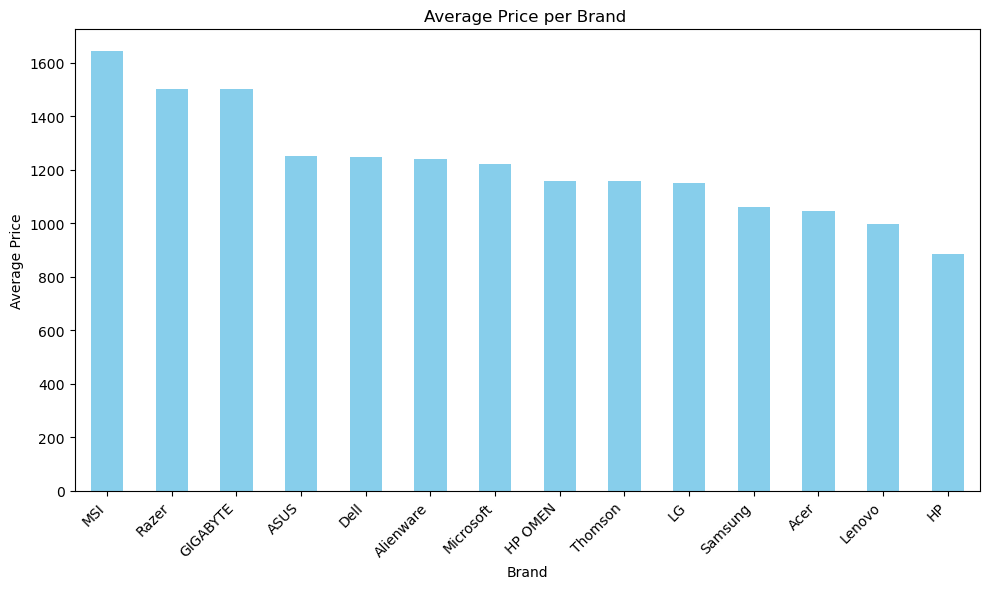

In [27]:
# Calculate average price per brand
average_price_per_brand = df.groupby('brand')['offers/price'].mean().sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
average_price_per_brand.plot(kind='bar', color='skyblue')
plt.title('Average Price per Brand ')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


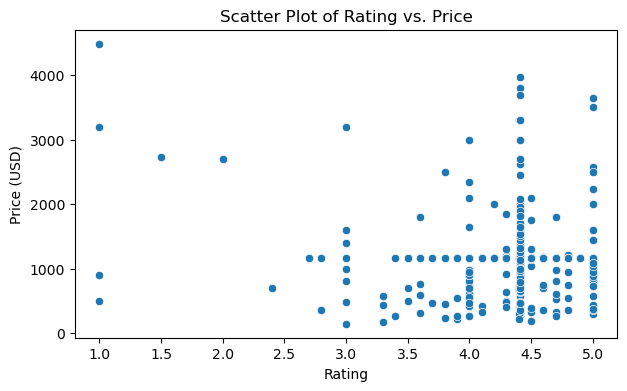

In [28]:
# Scatter plot of price vs. rating
plt.figure(figsize=(7, 4))
sns.scatterplot(x='aggregateRating/ratingValue', y='offers/price', data=df)
plt.title('Scatter Plot of Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price (USD)')
plt.show()  # Display scatter plot

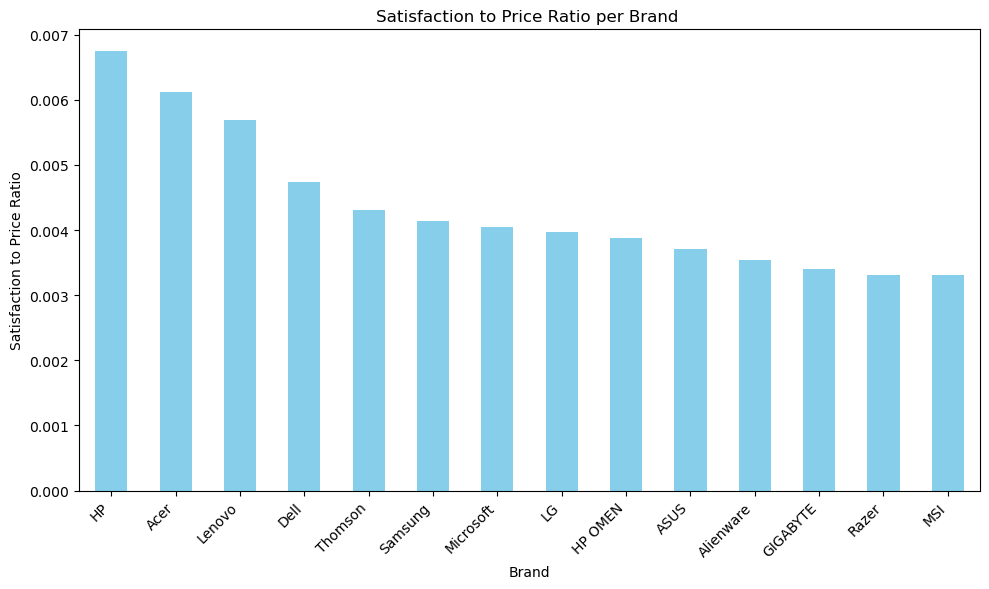

In [29]:
# Calculate satisfaction to price ratio
df['satisfaction_to_price_ratio'] = df['aggregateRating/ratingValue'] / df['offers/price']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
df.groupby('brand')['satisfaction_to_price_ratio'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Satisfaction to Price Ratio per Brand ')
plt.xlabel('Brand')
plt.ylabel('Satisfaction to Price Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

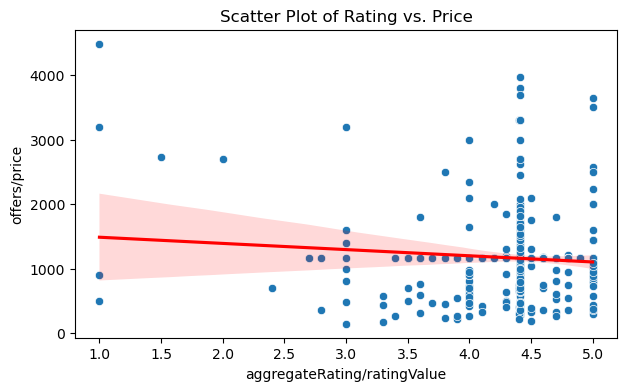

In [30]:
# Scatter plot of price vs. rating
plt.figure(figsize=(7, 4))
sns.scatterplot(x='aggregateRating/ratingValue', y='offers/price', data=df)
plt.title('Scatter Plot of Rating vs. Price')
plt.xlabel('Rating')
plt.ylabel('Price (USD)')

# Add a red line of best fit
sns.regplot(x='aggregateRating/ratingValue', y='offers/price', data=df, scatter=False, color='red')
plt.show()  # Display scatter plot with red line of best fit


In [31]:
# coorelation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


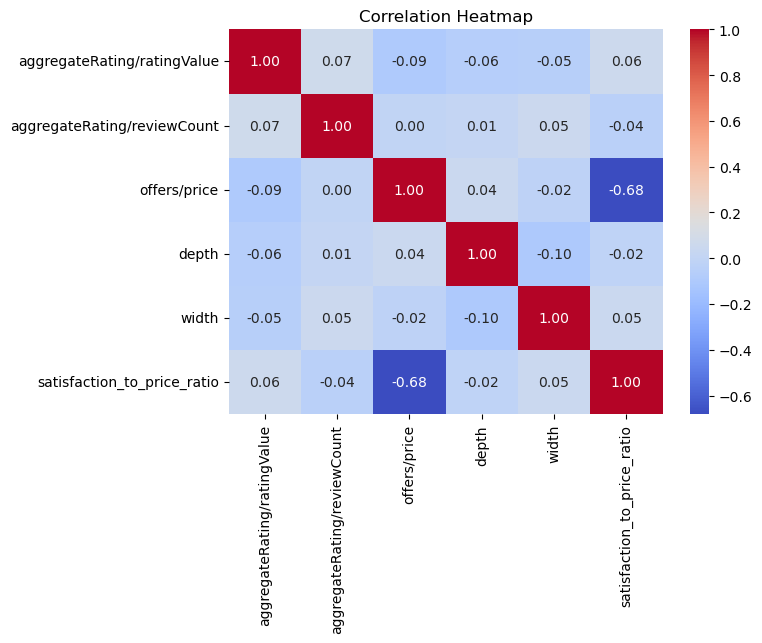

In [32]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()  # Show heatmap as image

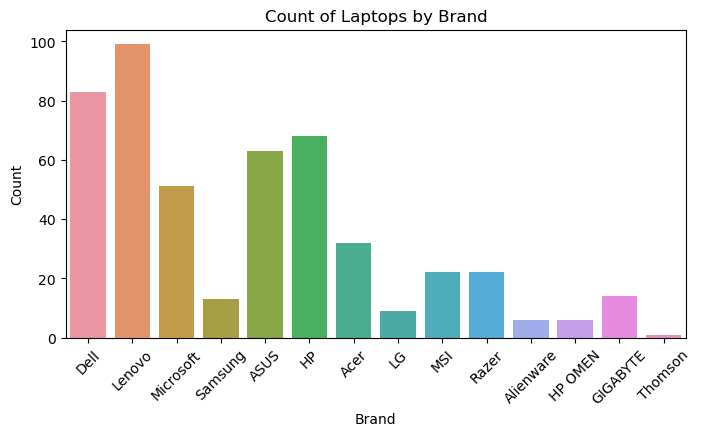

In [26]:
# Count plot of brands
plt.figure(figsize=(8, 4))
sns.countplot(x='brand', data=df)
plt.title('Count of Laptops by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  # Show count plot as image 


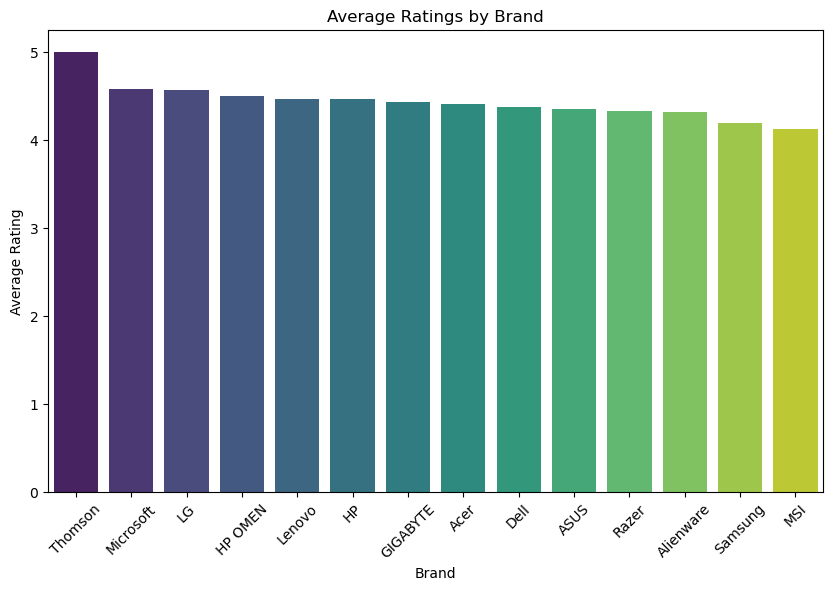

In [99]:
# Group by brand and calculate aggregate statistics
brand_comparison = df.groupby('brand').agg({
    'aggregateRating/ratingValue': 'mean',  # Average rating per brand
    'aggregateRating/reviewCount': 'sum'    # Total review count per brand
}).reset_index()

# Sort by average rating value in descending order
brand_comparison = brand_comparison.sort_values(by='aggregateRating/ratingValue', ascending=False)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(y='aggregateRating/ratingValue', x='brand', data=brand_comparison, palette='viridis')
plt.title('Average Ratings by Brand')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()



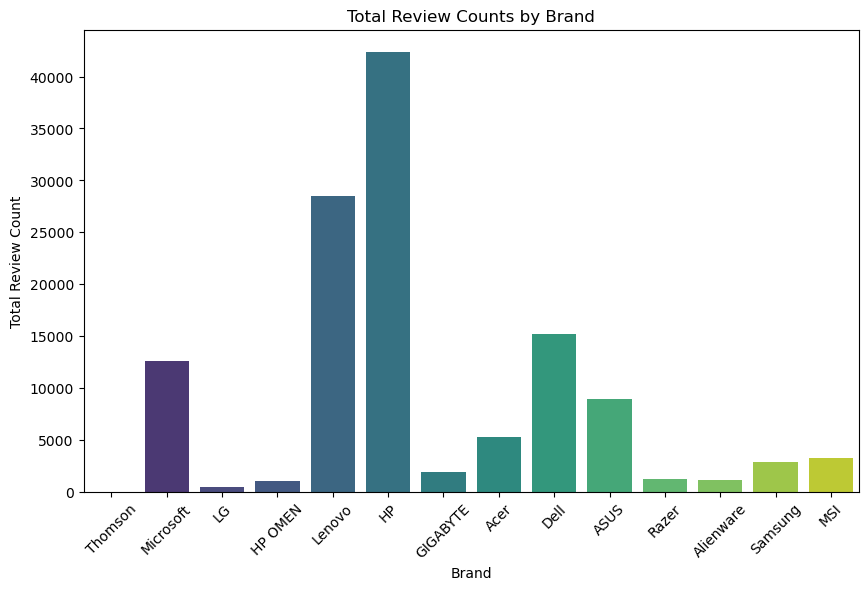

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(y='aggregateRating/reviewCount', x='brand', data=brand_comparison, palette='viridis')
plt.title('Total Review Counts by Brand')
plt.ylabel('Total Review Count')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

# Predictive modelling

In [27]:
# Data Preprocessing and model evaluation
# Identify features and target variable
features = ['offers/price', 'depth', 'width', 'aggregateRating/reviewCount']
target = 'aggregateRating/ratingValue'

In [28]:
# Separate features and target variable
X = df[features]
y = df[target]


In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
    ])


In [32]:
# Define models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

In [33]:
# Evaluate each model using cross-validation
for name, model in models:
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', model)])
    cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{name}: Mean MSE: {-cv_scores.mean()} +/- {cv_scores.std()}")

Linear Regression: Mean MSE: 0.2552203395972278 +/- 0.032974586901554984
Decision Tree: Mean MSE: 0.5130571243102889 +/- 0.24039450550314453
Random Forest: Mean MSE: 0.2780983799892801 +/- 0.07556402248596175


In [34]:
# Fit and evaluate the best model on the test set
best_model = RandomForestRegressor(random_state=42)
best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('model', best_model)])
best_model_pipeline.fit(X_train, y_train)
y_pred = best_model_pipeline.predict(X_test)


In [35]:
print("Test Set Evaluation:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Test Set Evaluation:
MSE: 0.365443768424036
MAE: 0.31761530612244937
R-squared: 0.20776403277425148


# Feature important analysis



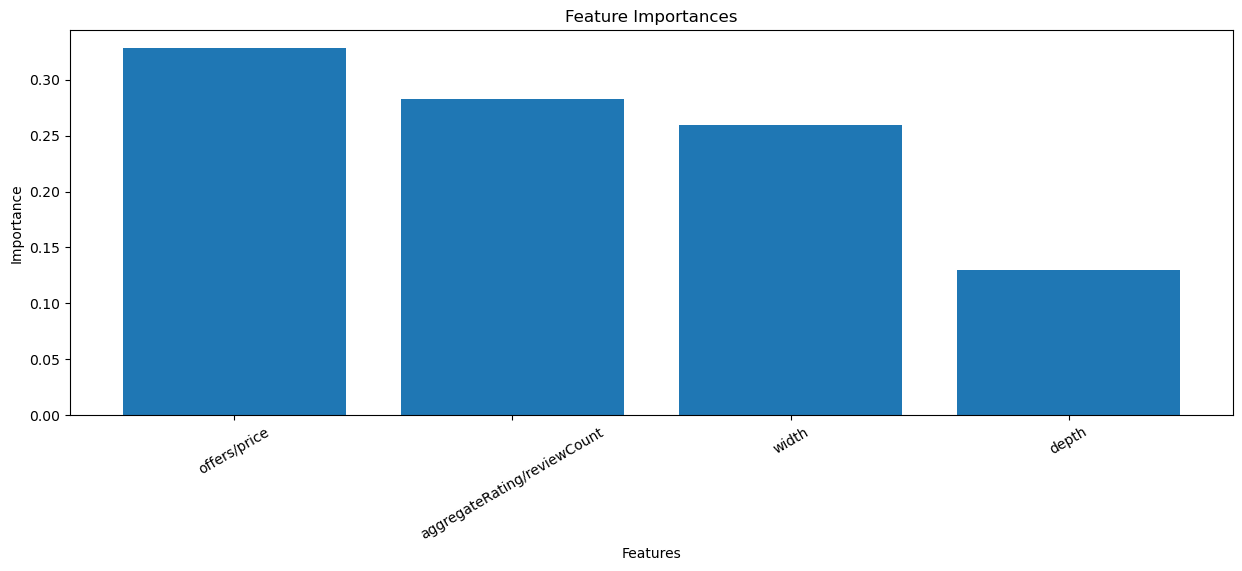

In [36]:
# Check if the best model supports feature importances
if 'feature_importances_' in dir(best_model_pipeline.named_steps['model']):
    # Get feature importances if available
    feature_importances = best_model_pipeline.named_steps['model'].feature_importances_
    feature_names = X_train.columns
    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    sorted_feature_names = feature_names[sorted_indices]
    sorted_feature_importances = feature_importances[sorted_indices]
    # Plot feature importances
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(feature_importances)), sorted_feature_importances)
    plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=30)
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()  # Show Feature Importances as image

else:
    print("Feature importances are not available for this model.")



# Sentiment analysis
**sentiment analysis using the rating and review counts to gauge consumer satisfaction across different brands or models**

In [39]:
# Assuming df is your DataFrame containing the dataset
# Calculate sentiment score
df['sentiment_score'] = df['aggregateRating/ratingValue'] * df['aggregateRating/reviewCount']

# Aggregate sentiment scores by brand
brand_sentiment = df.groupby('brand')['sentiment_score'].mean().reset_index()

# Aggregate sentiment scores by model
model_sentiment = df.groupby('model')['sentiment_score'].mean().reset_index()

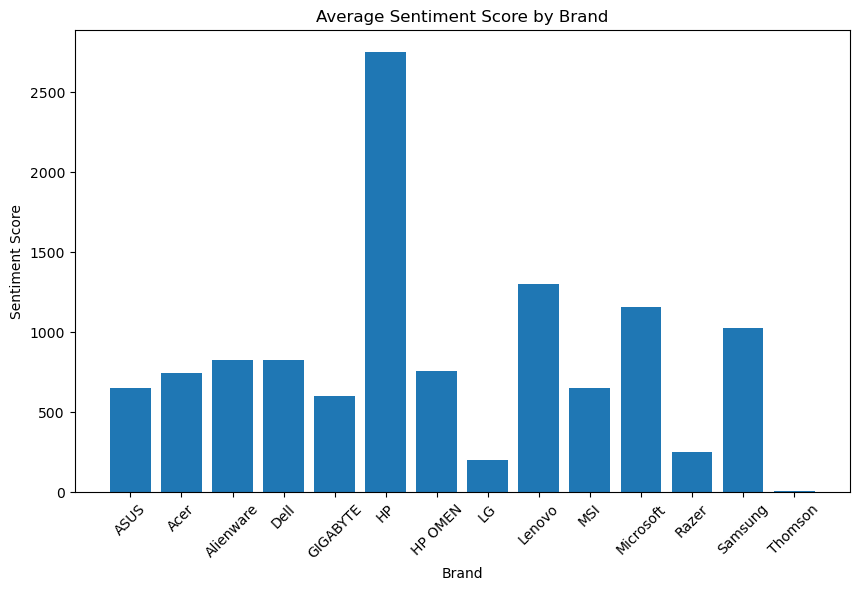

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(brand_sentiment['brand'], brand_sentiment['sentiment_score'])
plt.xlabel('Brand')
plt.ylabel('Sentiment Score')
plt.title('Average Sentiment Score by Brand')
plt.xticks(rotation=45)
plt.show()


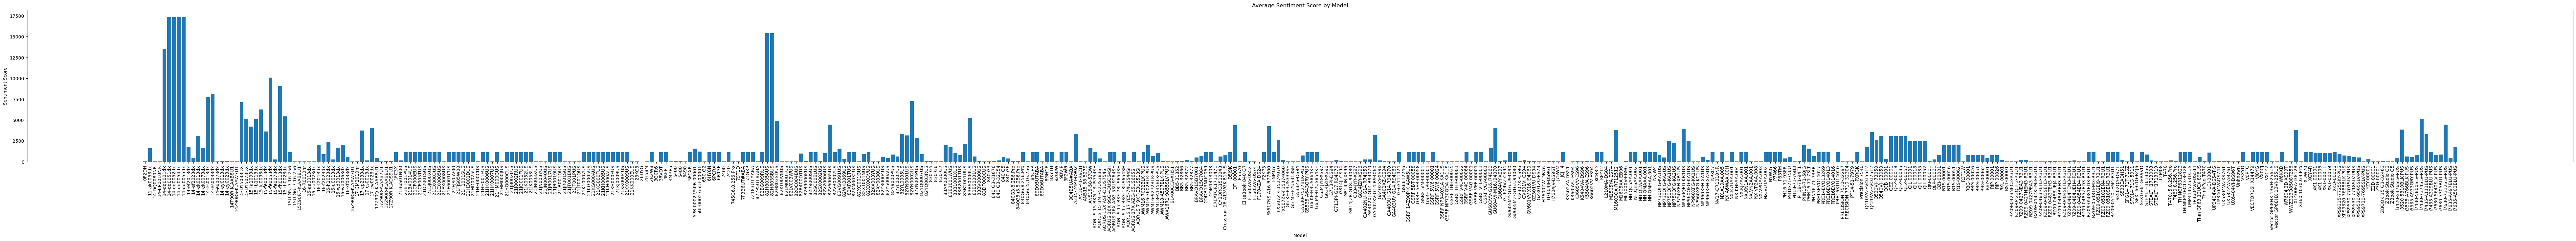

In [48]:
# Visualization - Bar chart for model sentiment
plt.figure(figsize=(100, 6))
plt.bar(model_sentiment['model'], model_sentiment['sentiment_score'])
plt.xlabel('Model')
plt.ylabel('Sentiment Score')
plt.title('Average Sentiment Score by Model')
plt.xticks(rotation=90)
plt.show()

